# Log scores to actual data

This notebook analyzes models that predict actual weighted ILI from week number and log scores from each model.

Ideally log scores of [a few] previous weeks should be used.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src/")
from collections import OrderedDict
import cellbell

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils
from models import SimpleDenseDirect

from sklearn.model_selection import train_test_split

## Data

In [4]:
data_file = "../data/processed/stacking-data-with-actual.h5"
df = pd.read_hdf(data_file, "data")

In [6]:
df.head()

actual  \
analysis_time_season analysis_time_season_week region               
1998/1999            11                        National  1.308800   
                                               Region4   0.766900   
                                               Region7   0.770374   
                                               Region9   0.991728   
                     12                        National  1.417440   

                                                         (onset_log_score, kcde)  \
analysis_time_season analysis_time_season_week region                              
1998/1999            11                        National                -2.121932   
                                               Region4                 -1.930332   
                                               Region7                 -2.787093   
                                               Region9                 -1.679324   
                     12                        National                -2.027988   

                                                         (onset_log_score, kde)  \
analysis_time_season analysis_time_season_week region                             
1998/1999            11                        National               -1.071299   
                                               Region4                -1.736714   
                                               Region7                -1.310200   
                                               Region9                -1.164344   
                     12                        National               -1.071299   

                                                         (onset_log_score, sarima)  \
analysis_time_season analysis_time_season_week region                                
1998/1999            11                        National                  -1.129175   
                                               Region4                   -3.381395   
                                               Region7                   -1.509140   
                                               Region9                   -1.147277   
                     12                        National                  -1.621005   

                                                         (onset_log_score, trunc_kde)  \
analysis_time_season analysis_time_season_week region                                   
1998/1999            11                        National                     -0.943441   
                                               Region4                      -1.741570   
                                               Region7                      -1.340147   
                                               Region9                      -1.305831   
                     12                        National                     -0.930614   

                                                         (peak_week_log_score, kcde)  \
analysis_time_season analysis_time_season_week region                                  
1998/1999            11                        National                    -2.406767   
                                               Region4                     -1.533106   
                                               Region7                     -2.366188   
                                               Region9                     -2.155898   
                     12                        National                    -1.753218   

                                                         (peak_week_log_score, kde)  \
analysis_time_season analysis_time_season_week region                                 
1998/1999            11                        National                   -1.446239   
                                               Region4                    -1.473751   
                                               Region7                    -1.478319   
                                               Region9                    -1.570827   
                     12               

## Model

In [12]:
SimpleDenseDirect(4, 10).model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_19 (Dense)                 (None, 10)            50                                           
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 10)            0                                            
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 10)            110                                          
____________________________________________________________________________________________________
embedding_4 (Embedding)          (None, 1, 10)         540                                          
___________________________________________________________________________________________

In [23]:
weeks = df.index.get_level_values("analysis_time_season_week").values
log_scores = df.as_matrix()[:, 1:5] # Doing it for onset only
y = df.as_matrix()[:, 0]

In [28]:
L_train, L_test, W_train, W_test, y_train, y_test = train_test_split(log_scores, weeks, y,
                                                                     test_size=0.20, random_state=1234)
    
model_onset = SimpleDenseDirect(4, 10)
history = model_onset.fit([L_train, W_train], y_train,
                          nb_epoch=100,
                          validation_data=([L_test, W_test], y_test),
                          verbose=1)

Train on 2487 samples, validate on 622 samples
Epoch 1/100
2487/2487 [==============================] - 0s - loss: 5.0886 - val_loss: 2.9178
Epoch 2/100
2487/2487 [==============================] - 0s - loss: 2.1671 - val_loss: 2.0889
Epoch 3/100
2487/2487 [==============================] - 0s - loss: 1.7417 - val_loss: 1.9497
Epoch 4/100
2487/2487 [==============================] - 0s - loss: 1.6264 - val_loss: 1.8980
Epoch 5/100
2487/2487 [==============================] - 0s - loss: 1.5672 - val_loss: 1.8499
Epoch 6/100
2487/2487 [==============================] - 0s - loss: 1.5340 - val_loss: 1.8054
Epoch 7/100
2487/2487 [==============================] - 0s - loss: 1.5161 - val_loss: 1.7899
Epoch 8/100
2487/2487 [==============================] - 0s - loss: 1.4989 - val_loss: 1.7789
Epoch 9/100
2487/2487 [==============================] - 0s - loss: 1.4912 - val_loss: 1.7665
Epoch 10/100
2487/2487 [==============================] - 0s - loss: 1.4891 - val_loss: 1.7578
Epoch 11/100

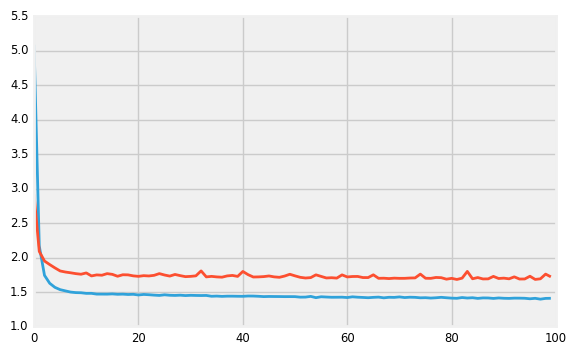

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])